# Tutorial del Proyecto Naive Bayes

## OBJECTIVE:

## Create a Google Play Store review classifier

### 0. Data ingestion

In [52]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
df_reviews = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")

### 1. General information about the data set

#### 1.0. Data type

In [30]:
df_reviews

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


In [31]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


#### 1.1. Checking for duplicated in the dataset and removing them if necessary

In [32]:
df_reviews.duplicated().sum()

np.int64(0)

#### 1.2. Information about number of null or empty values in each column

In [33]:
missing_values = df_reviews.isnull().sum()
missing_values

package_name    0
review          0
polarity        0
dtype: int64

<Axes: >

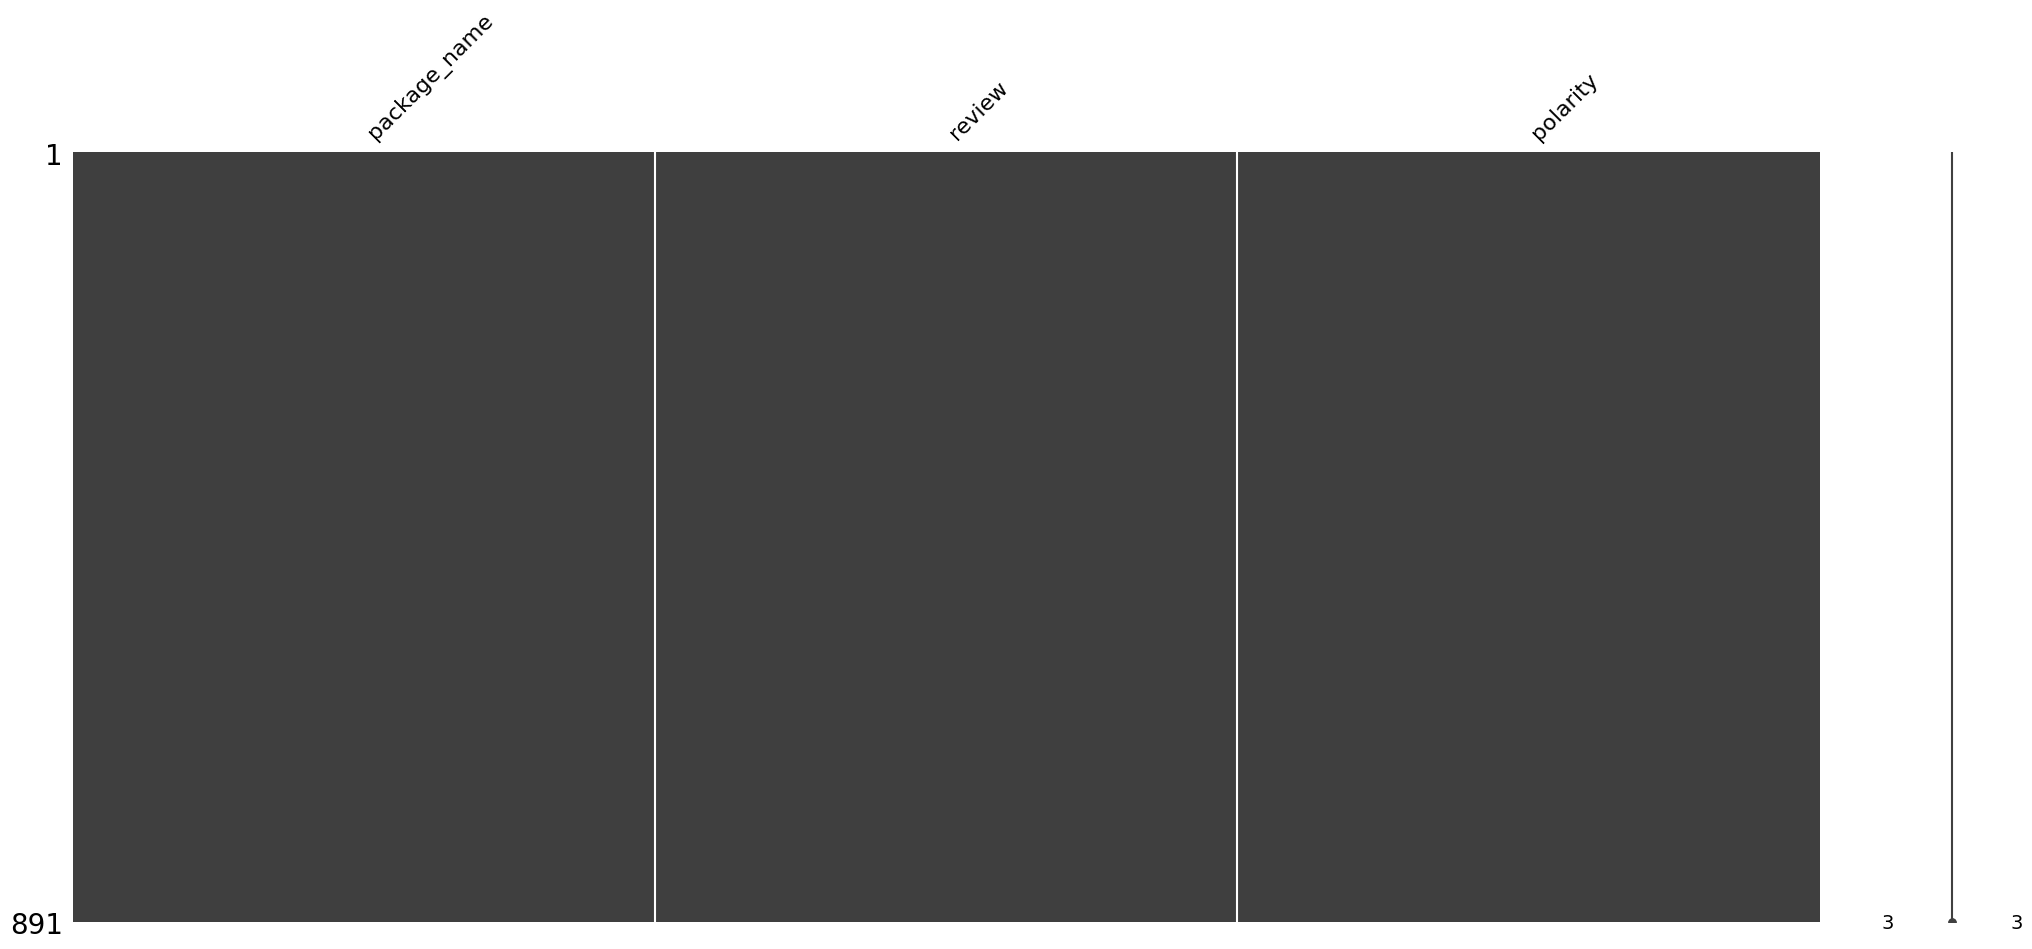

In [34]:
msno.matrix(df_reviews)

### 2. Delete unnecessary variables

In [35]:
df_reviews =  df_reviews.drop(columns = ["package_name"])

In [36]:
df_reviews

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


### 3. Remove spaces and transform text to lowercase

In [37]:
df_reviews["review"] = df_reviews["review"].str.strip().str.lower()

In [38]:
df_reviews

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


### 4. Data division

In [39]:
X = df_reviews.drop("polarity", axis = 1)
y = df_reviews["polarity"]

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_test, X_anon, y_test, y_anon = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape, X_anon.shape, df_reviews.shape

((534, 1), (178, 1), (179, 1), (891, 2))

### 5. Transform the text into a word count matrix

In [41]:
vec_model = CountVectorizer(stop_words = "english")
X_train_vec_model = vec_model.fit_transform(X_train["review"]).toarray()
X_test_vec_model = vec_model.transform(X_test["review"]).toarray()

In [42]:
vec_model.get_feature_names_out()

array(['000', '04', '0x', ..., 'żŕľ', 'žŕ', 'žŕľ'],
      shape=(2834,), dtype=object)

In [43]:
X_test_vec_model

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(178, 2834))

In [44]:
X_test

,review
849,excellent
331,just did the latest update on viber and yet ag...
260,chrome browser (update: 3) ... barrister akash...
316,can't hook up credit card to wallet unable to ...
292,i can't restore history messages with latest v...
...,...
311,unstable call connection it's showing an unsta...
670,auto capitalization needed. it doesn't automat...
172,so fun! i'm totally addicted to this game. i p...
587,ever so useful evernote it is so easy to 'scri...


### 6. Build a Naive Bayes models

#### 6.0. MultinomialNB:

In [47]:
multi_clf = MultinomialNB()
multi_clf.fit(X_train_vec_model, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [49]:
y_pred_multi_clf = multi_clf.predict(X_test_vec_model)
y_pred_multi_clf

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

In [50]:
print("MultinomialNB accuracy:", multi_clf.score(X_test_vec_model, y_test))

MultinomialNB accuracy: 0.8539325842696629


In [53]:
print("Accuracy MultinomialNB:", accuracy_score(y_test, y_pred_multi_clf))

Accuracy MultinomialNB: 0.8539325842696629


In [54]:
print(classification_report(y_test, y_pred_multi_clf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       115
           1       0.85      0.71      0.78        63

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



#### 6.1. GaussianNB:

In [55]:
gauss_clf = GaussianNB()
gauss_clf.fit(X_train_vec_model, y_train)

,priors,None
,var_smoothing,1e-09


In [56]:
y_pred_gauss_clf = gauss_clf.predict(X_test_vec_model)
y_pred_gauss_clf

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [57]:
print("GaussianNB accuracy:", gauss_clf.score(X_test_vec_model, y_test))

GaussianNB accuracy: 0.8314606741573034


In [58]:
print("Accuracy GaussianNB:", accuracy_score(y_test, y_pred_gauss_clf))

Accuracy GaussianNB: 0.8314606741573034


In [59]:
print(classification_report(y_test, y_pred_gauss_clf))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       115
           1       0.81      0.68      0.74        63

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



#### 6.2. BernoulliNB:

In [60]:
bern_clf = BernoulliNB()
bern_clf.fit(X_train_vec_model, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [61]:
y_pred_bern_clf = bern_clf.predict(X_test_vec_model)
y_pred_bern_clf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [64]:
print("BernoulliNB accuracy:", bern_clf.score(X_test_vec_model, y_test))

BernoulliNB accuracy: 0.7303370786516854


In [67]:
print("Accuracy BernoulliNB:", accuracy_score(y_test, y_pred_bern_clf))

Accuracy BernoulliNB: 0.7303370786516854


In [66]:
print(classification_report(y_test, y_pred_bern_clf))

              precision    recall  f1-score   support

           0       0.72      0.97      0.82       115
           1       0.83      0.30      0.44        63

    accuracy                           0.73       178
   macro avg       0.77      0.63      0.63       178
weighted avg       0.76      0.73      0.69       178



### 7. Naive Bayes models conclusions:

- MultinomialNB: (Accuracy: 0.8539325842696629)

    Is the best model for this case. Recommended for text classification tasks such as sentiment analysis.

- GaussianliNB: (Accuracy: 0.8314606741573034)

    Its accuracy is quite good. It can be useful if we decide to use binary representation of the text (presence/absence of words).

- BernoulliNB: (Accuracy: 0.7303370786516854)

    This model assumes that the data follows a normal distribution, wich does not fit well with vectorised text data.

### 8. Model optimisation

MultinomialNB and Random Forest, are independent classfication models based on completely different statistical and computational principles.

    - MultinomialNB:
        Is a probabilistic model based on Bayesian theory, wich assumes that features (for example, words in a text), follow a multinomial distribution. It's pariculary useful for text data respresented as counts or frequencies.

    - Random Forest:
        Is an ensemble model that combines multiple decision trees. Each tree perfoms rule-based splits to classify the data, and forest votes on the final class.

Since each model has its own training logic, it is not possible to "optimise" one with the other. They don't share the same structure or decision criteria.